In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install --upgrade pip

         Time  Temperature_dc  Dew_Point_dc  Humidity_pr  Wind_Speed_kph  \
0  01/01/2016              28             7           32               7   
1  02/01/2016              28             8           35               5   
2  03/01/2016              28             6           32               4   
3  04/01/2016              25             9           41               6   
4  05/01/2016              27             9           39               6   

   Pressure_hg  Season  Heatstroke_cases  
0        30.03  Winter                 0  
1        30.06  Winter                 0  
2        30.00  Winter                 0  
3        29.94  Winter                 0  
4        29.97  Winter                 0  
Time                0
Temperature_dc      0
Dew_Point_dc        0
Humidity_pr         0
Wind_Speed_kph      0
Pressure_hg         0
Season              0
Heatstroke_cases    0
dtype: int64


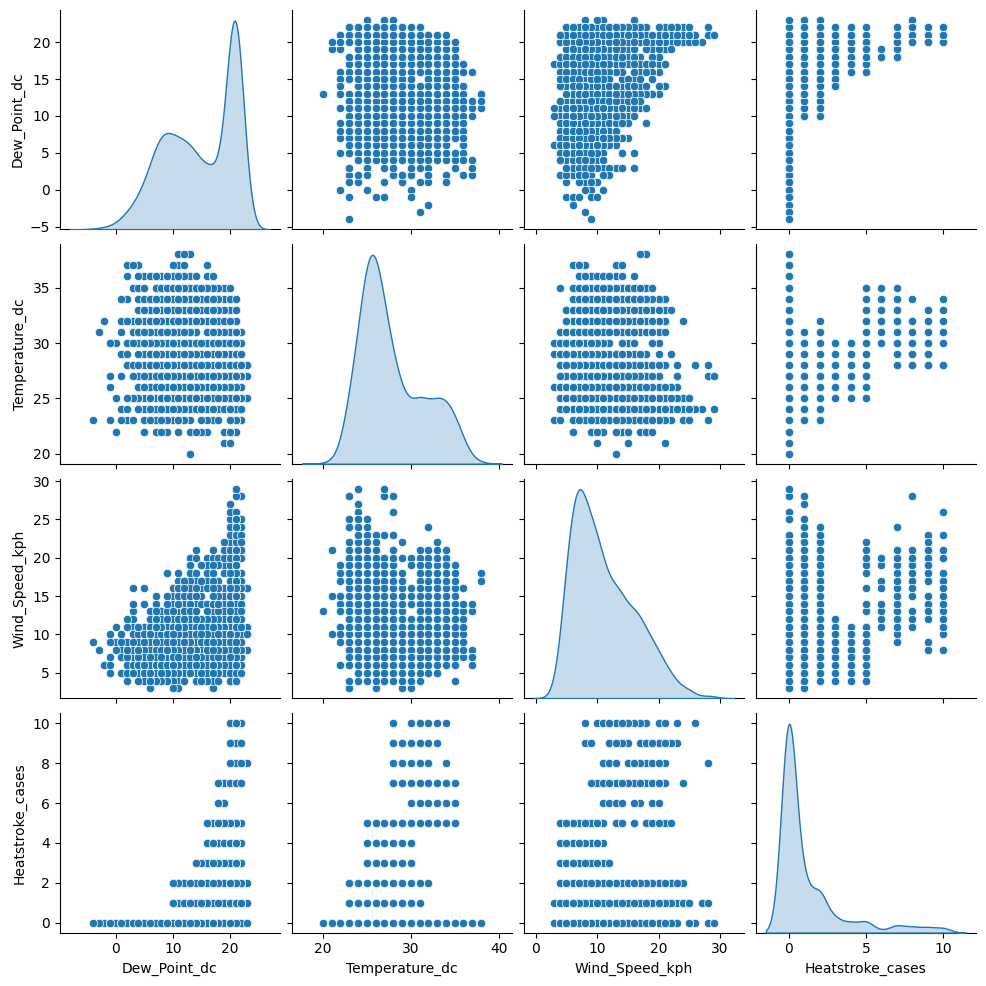

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/data_with_heatstroke_cases (2).csv')


print(data.head())

print(data.isnull().sum())


sns.pairplot(data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph', 'Heatstroke_cases']], diag_kind='kde')
plt.show()


scaler = StandardScaler()
data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']] = scaler.fit_transform(data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = data[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']]
y = data['Heatstroke_cases']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)


Mean Squared Error: 0.8948718394070966
Mean Absolute Error: 0.5876307626218924
R^2 Score: 0.825953561567113


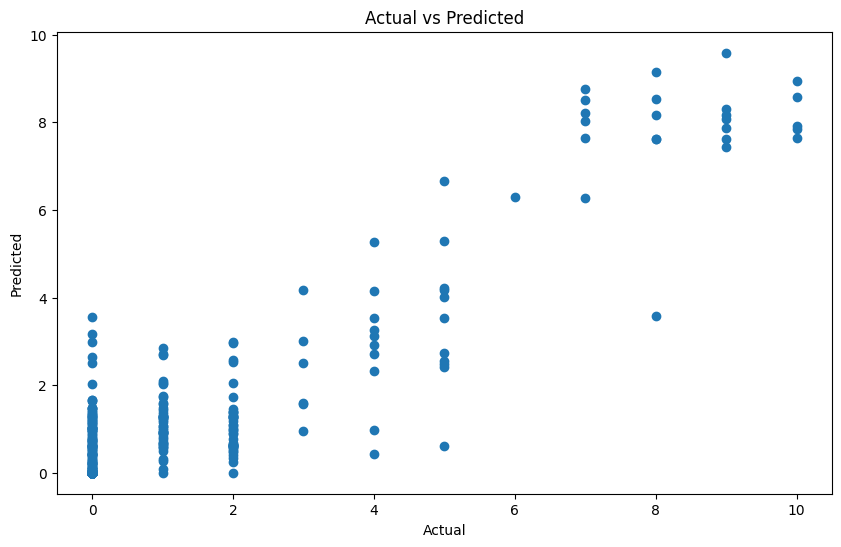

In [ ]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


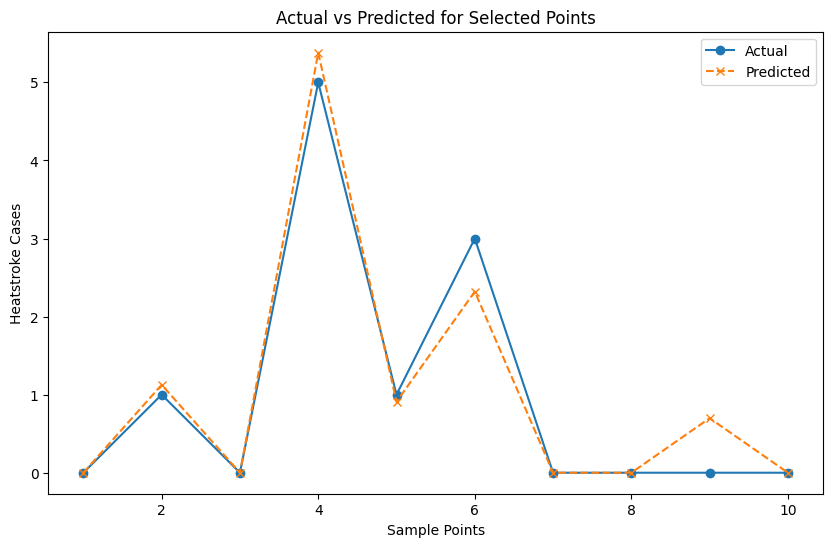

In [ ]:

sample_points = data.sample(10)


y_pred_sample = rf_regressor.predict(sample_points[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']])


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sample_points['Heatstroke_cases'], marker='o', label='Actual')
plt.plot(range(1, 11), y_pred_sample, marker='x', linestyle='--', label='Predicted')
plt.xlabel("Sample Points")
plt.ylabel("Heatstroke Cases")
plt.title("Actual vs Predicted for Selected Points")
plt.legend()
plt.show()


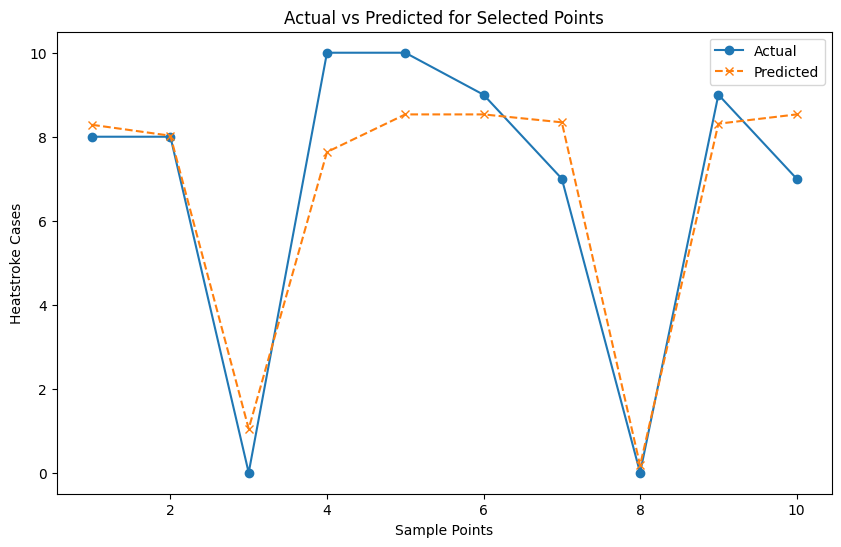

In [ ]:

sample_points = data.iloc[160:170]



y_pred_sample = rf_regressor.predict(sample_points[['Dew_Point_dc', 'Temperature_dc', 'Wind_Speed_kph']])


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sample_points['Heatstroke_cases'], marker='o', label='Actual')
plt.plot(range(1, 11), y_pred_sample, marker='x', linestyle='--', label='Predicted')
plt.xlabel("Sample Points")
plt.ylabel("Heatstroke Cases")
plt.title("Actual vs Predicted for Selected Points")
plt.legend()
plt.show()


In [ ]:

accuracy_rf = rf_regressor.score(X_test, y_test) * 100
print("Accuracy (Random Forest): {:.2f}%".format(accuracy_rf))


Accuracy (Random Forest): 82.60%


In [ ]:

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE (Random Forest): {:.2f}".format(rmse_rf))


RMSE (Random Forest): 0.95


In [ ]:
!pip install joblib
import joblib


joblib.dump(rf_regressor, 'RandomForest_model.joblib')

import os


print(os.listdir('/content'))

['.config', 'RandomForest_model.joblib', 'data_with_heatstroke_cases (2).csv', 'sample_data']
